In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import ipywidgets as widgets
from ipywidgets import interact

# Function to generate and plot the data
def generate_regression_data(N, noise):
    # Generate regression data with a linear relationship
    X, y = make_regression(n_samples=N, n_features=1, noise=noise, random_state=42)
    return X, y

def plot_regression(N, noise):
    # Generate the data
    X, y = generate_regression_data(N, noise)
    # Create a figure
    plt.figure(figsize=(10, 4))
    # Create a scatter plot of X vs y to show the regression line relationship
    plt.scatter(X, y, c='g')
    plt.title('Regression Data Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.grid(True)
    # Show the plot
    plt.show()

# Create interactive widgets
N_slider = widgets.IntSlider(value=100, min=50, max=250, step=25, description='N')
noise_slider = widgets.FloatSlider(value=10, min=0, max=50, step=5, description='Noise')

# Use interact to create an interactive plot
interact(plot_regression, N=N_slider, noise=noise_slider)

# Extract dataset for future use
N_value = 50  # Number of samples
noise_value = 10  # Noise level
X, y = generate_regression_data(N=N_value, noise=noise_value)


interactive(children=(IntSlider(value=100, description='N', max=250, min=50, step=25), FloatSlider(value=10.0,…

In [24]:
y

array([-19.06121027, -23.99713972,  12.38446082,   3.54215228,
         7.17340131,  11.75778875,  21.8114842 ,  -8.09862036,
         4.52978465,  -8.68203088,  18.35259248,  -7.18496288,
        -8.39335261, -16.37208709, -12.38564307,  16.60613374,
       -16.52096793, -13.80861872,  -5.37144719, -21.85917594,
       -24.47137038,   5.26648553,  29.01315819, -19.17439723,
        -9.53433087,  11.98808417,  -4.19606628,  54.37750422,
        -5.62277799,   2.15808362,  -2.31182281,  12.82113365,
       -13.06387543,  -3.03474791,   5.48449852,   9.14624925,
       -27.73687531,  -4.54360873,   5.51456273,  18.07082383,
         6.92900565,  -4.99873762, -15.54533985,   7.31389758,
         0.8872496 , -33.04327665,  33.5401996 , -34.68656963,
       -20.68679427,  -7.92153774])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=5)
X_train.shape, X_test.shape

((45, 1), (5, 1))

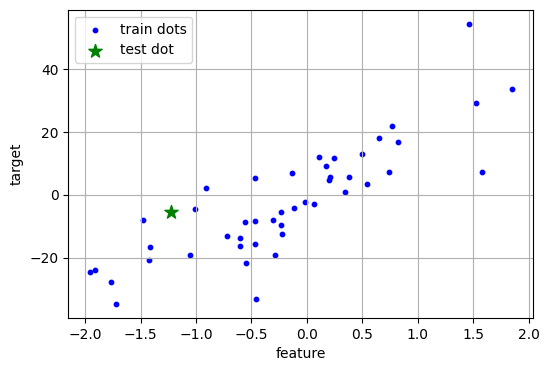

In [28]:
plt.figure(figsize=(6, 4))
idx = 0
test_dot = X_test[idx]
plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.grid()
plt.scatter(X_test[idx, 0], y_test[idx], c='g', marker='*', s=100, label='test dot')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend();

Recall that by default, a model with sklearn is trained with the weights=uniform attribute — this means that each neighbor is equally important and equally influences the final prediction of the model

In [30]:
from sklearn.neighbors import KNeighborsRegressor
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |

But we can change this and make some neighbors more significant while making others less significant by setting the weights attribute to distance

n_neighbors - 10

In [59]:
n_neighbors = 15
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')

In [60]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [61]:
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.6424558155554139

In [62]:
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')


In [63]:
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.5899295105766682

n_neighbors - 5

In [65]:
n_neighbors = 5
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
model

KNeighborsRegressor(weights='distance')

In [66]:
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.7277089157461014

In [69]:
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.7807474118215368